## Exercise 1.1

In [2]:
import pandas as pd

### 1. Data Preparation

In [2]:
# load the dataset and display the first 5 rows
df = pd.read_csv('Files_For_A2/cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We first need to check for missing values and convert non-numeric to numeric

In [3]:
# display the number of missing values for each column

missing_values = df.isnull().sum()
missing_values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# display key information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We can see that there is only 1 categorical attribute, so we need to convert in to a numeric attribute and save it for later use. We will also remove the 'id' attribute as it would skew our results.

In [5]:
# drop the id column
df.drop('id', axis=1, inplace=True)

In [6]:
# display the counts of the categorical data
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
# convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

# initialize LabelEncoder
labelencoder = LabelEncoder()

# convert the categorical data to numerical data and display the first 5 rows
df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'])
diagnosis = df['diagnosis']
df.drop('diagnosis', axis=1, inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we have:
- B == 0
- M == 1

Now we can scale the data using the z-score method

In [8]:
normalized_df = (df - df.mean()) / df.std()
normalized_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


We can see that the data is normalized by checking if the mean and standard deviation are 0, and 1 respectively

In [9]:
normalized_df.std().mean(), round(normalized_df.mean().mean())

(1.0, 0)

### 2. PCA Application

Here we will use the sklearn PCA class to perform the PCA 

In [10]:
from sklearn.decomposition import PCA
num_components = 10
pca = PCA(n_components=num_components)
pca.fit(normalized_df)

principalComponents = pca.fit_transform(normalized_df)
pca_df = pd.DataFrame(data=principalComponents, columns=[f"PC{i+1}" for i in range(num_components)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.184755,1.946870,-1.122179,3.630536,-1.194059,1.410184,2.157471,-0.398058,-0.156979,-0.876629
1,2.385703,-3.764859,-0.528827,1.117281,0.621228,0.028631,0.013347,0.240777,-0.711278,1.106017
2,5.728855,-1.074229,-0.551263,0.911281,-0.176930,0.540976,-0.667580,0.097285,0.024049,0.453891
3,7.116691,10.266556,-3.229948,0.152413,-2.958275,3.050738,1.428653,1.058627,-1.404197,-1.115960
4,3.931842,-1.946359,1.388545,2.938054,0.546267,-1.225416,-0.935389,0.635817,-0.263575,0.377375
...,...,...,...,...,...,...,...,...,...,...
564,6.433655,-3.573673,2.457324,1.176279,-0.074759,-2.373105,-0.595606,-0.035441,0.987060,0.256773
565,3.790048,-3.580897,2.086640,-2.503825,-0.510274,-0.246493,-0.715697,-1.112380,-0.105115,-0.108539
566,1.255075,-1.900624,0.562236,-2.087390,1.808400,-0.533977,-0.192589,0.341588,0.393571,0.520409
567,10.365673,1.670540,-1.875379,-2.353960,-0.033712,0.567437,0.222885,-0.279996,-0.541556,-0.089201


### 3. Variance Analysis

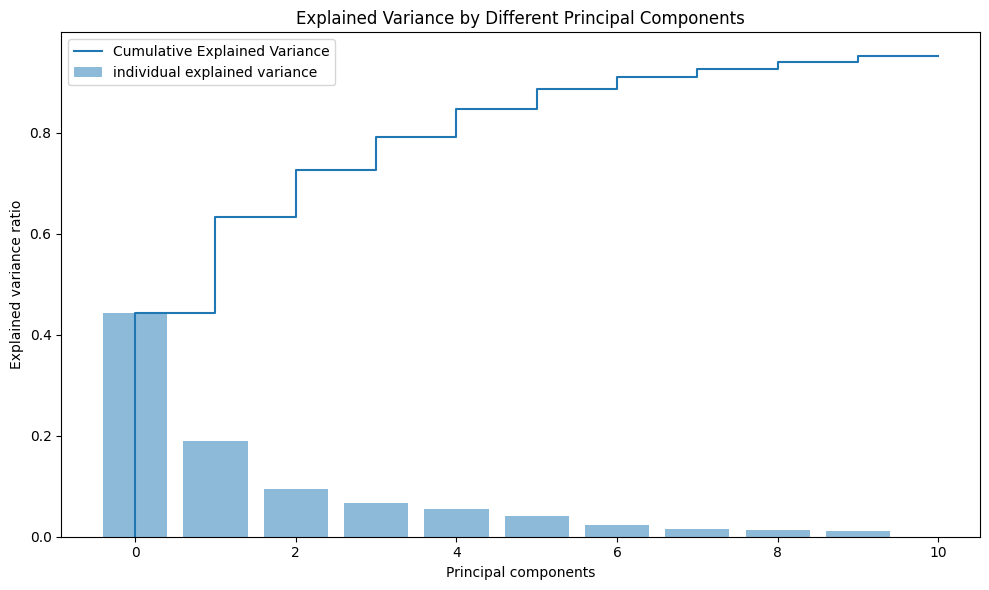

In [11]:
import matplotlib.pyplot as plt
import numpy as np

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance)

# plot the explained variance and the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.title('Explained Variance by Different Principal Components')
plt.plot(range(len(explained_variance) + 1), [0] + list(cumulative_explained_variance), label='Cumulative Explained Variance', drawstyle='steps')
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 4. Visualization

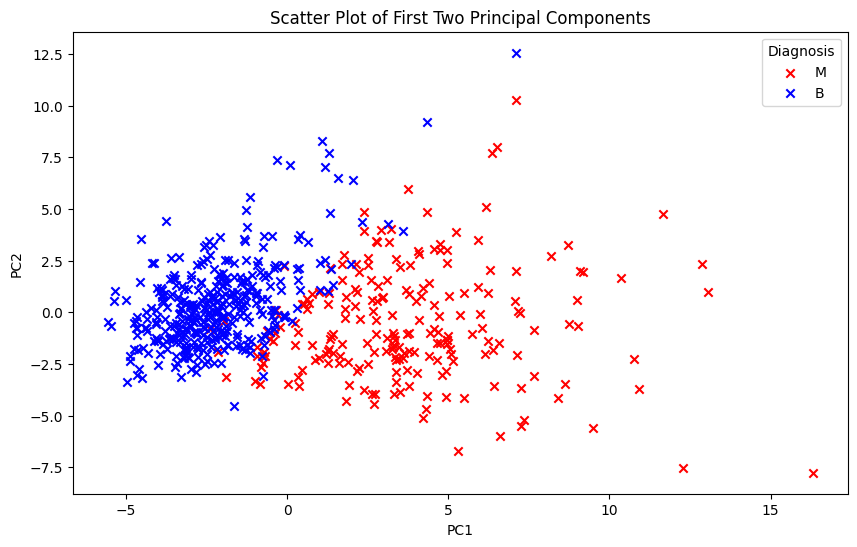

In [19]:
pca_df['diagnosis'] = diagnosis

# separate the data into two categories
category_M = pca_df[pca_df['diagnosis'] == 1]
category_B = pca_df[pca_df['diagnosis'] == 0]

# plot the first two principal components
plt.figure(figsize=(10, 6))

plt.scatter(category_M['PC1'], category_M['PC2'], c='red', label='M', marker='x')
plt.scatter(category_B['PC1'], category_B['PC2'], c='blue', label='B', marker='x')

# add title and labels
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# add legend
plt.legend(title='Diagnosis')

# display the plot
plt.show()


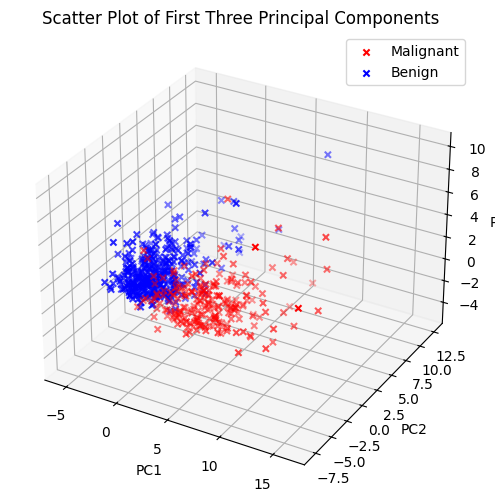

In [33]:
# create a 3D scatter subplot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# plot the first three principal components
ax.scatter(category_M['PC1'], category_M['PC2'], category_M['PC3'], c='red', label='Malignant', marker='x')
ax.scatter(category_B['PC1'], category_B['PC2'], category_B['PC3'], c='blue', label='Benign', marker='x')

# add title and labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.set_title('Scatter Plot of First Three Principal Components')

ax.legend()

plt.show()


### 5. Interpretation

Based on the visualizations, it does appear that a predictive model could be developed to distinguish between malignant and benign tumors with a resonable degree of accuracy.

The 3D scatter plot shows a clear distintion between malignent and benign tumors, this suggests that the principle components have captured significant features which differenciate the 2 types of tumors. We can also observe that both tumors form distinct clusters, which indicates that there is a pattern a predictive model could learn from.

Overall, since there is a clear distinction in the data and we are using PCA which implies these components retain most of the variance in the dataset, we can say that a predictive model should perform well.